## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [2]:
category_data = pd.read_csv("/Users/chetan/MLOps/recommendation-system-shopverse/data/raw/category_tree.csv")
events_data = pd.read_csv("/Users/chetan/MLOps/recommendation-system-shopverse/data/raw/events.csv")
item_data = pd.read_csv("/Users/chetan/MLOps/recommendation-system-shopverse/data/raw/item_properties.csv")

### Category Data Analysis

###### Structure of Category Data

In [3]:
print(f"The dataset has {category_data.shape[0]} rows and {category_data.shape[1]} columns")
category_data.head()

The dataset has 1669 rows and 2 columns


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


###### Let's plot the Number of Categories per Parent Category

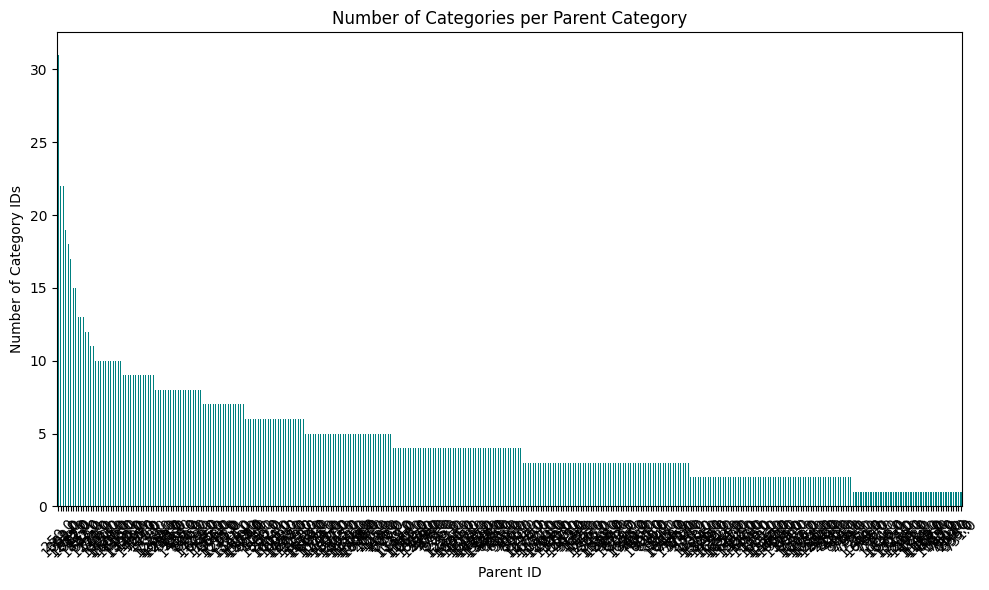

In [4]:
# Group by parentid and count the number of categoryids
parent_counts = category_data.groupby('parentid')['categoryid'].count().sort_values(ascending=False)

# Plot it
plt.figure(figsize=(10, 6))
parent_counts.plot(kind='bar', color='teal')

plt.title('Number of Categories per Parent Category')
plt.xlabel('Parent ID')
plt.ylabel('Number of Category IDs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Event Data Analysis

###### Structure of Events Data

In [5]:
print(f"The dataset has {events_data.shape[0]} rows and {events_data.shape[1]} columns")
events_data.head()

The dataset has 2756101 rows and 5 columns


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


###### Column statistics

In [6]:
print(f"The number of unique visitors are: {len(events_data['visitorid'].unique())}")
print(f"Event attributes: {events_data['event'].unique()}")
print(f"The number of unique Items: {len(events_data['itemid'].unique())}")
print(f"Number of transactions: {events_data['transactionid'].notnull().sum()}")
print("Data Description")
events_data.describe()

The number of unique visitors are: 1407580
Event attributes: ['view' 'addtocart' 'transaction']
The number of unique Items: 235061
Number of transactions: 22457
Data Description


,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [7]:
events_data.isnull().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

event
view           2664312
addtocart        69332
transaction      22457
Name: timestamp, dtype: int64


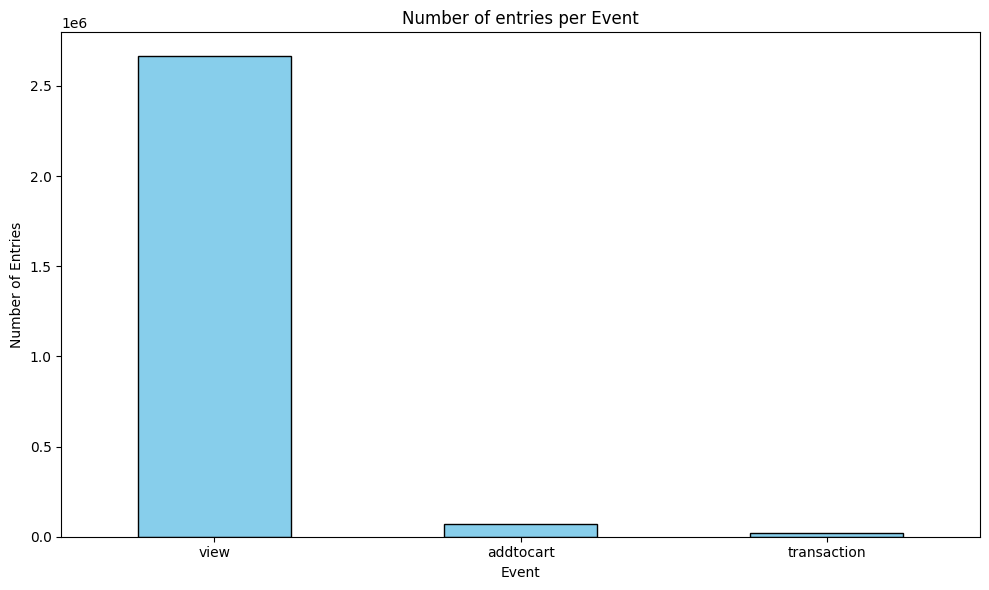

In [8]:
# Group by event column and count the number of counts for each event
event_counts = events_data.groupby('event')['timestamp'].count().sort_values(ascending=False)
print(event_counts)

# Plot it
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of entries per Event')
plt.xlabel('Event')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###### Observation

In [9]:
print(f"""Out of {events_data.shape[0]} views,
only {event_counts['transaction'] / events_data.shape[0] * 100:.2f}% became transactions,
and {event_counts['addtocart'] / events_data.shape[0] * 100:.2f}% were added to cart.""")

Out of 2756101 views,
only 0.81% became transactions,
and 2.52% were added to cart.


###### User activity plot - peak view hours

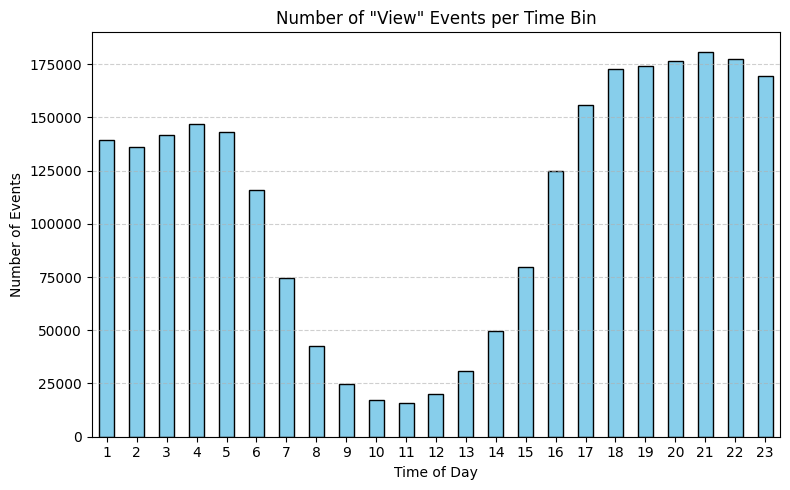

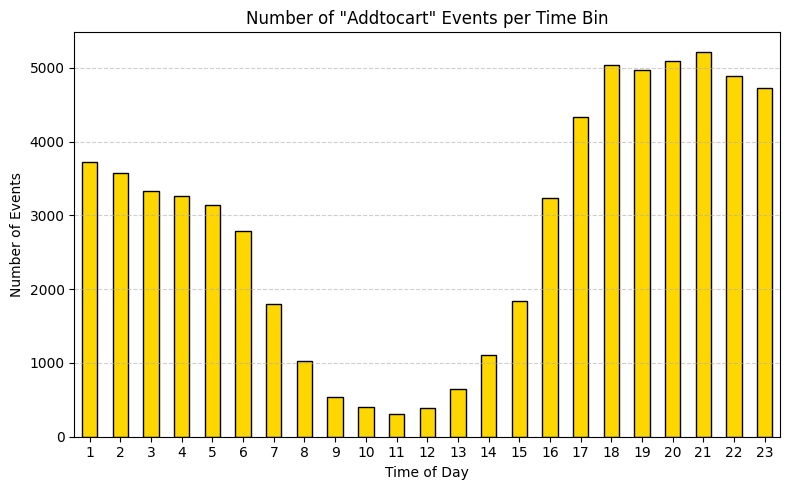

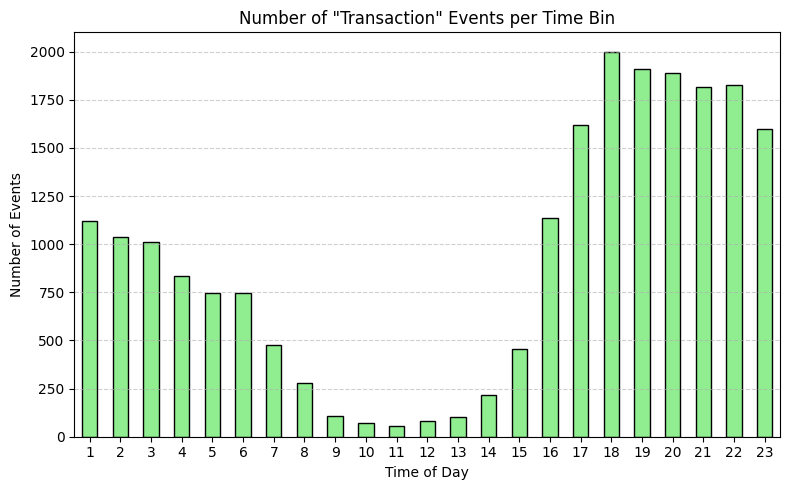

In [10]:
# Step 1: Convert timestamp to datetime if not already done
events_data['datetime'] = pd.to_datetime(events_data['timestamp'], unit='ms', utc=True)

# Step 2: Extract hour and assign to time bins
events_data['hour'] = events_data['datetime'].dt.hour
time_bins = list(range(24))#[0, 4, 8, 12, 16, 20, 24]
time_labels = list(range(1,24)) #['00–04', '04–08', '08–12', '12–16', '16–20', '20–24']
events_data['time_bin'] = pd.cut(events_data['hour'], bins=time_bins, labels=time_labels, right=False)

# Step 3: Function to plot bar charts
def plot_event_distribution(event_type, color):
    subset = events_data[events_data['event'] == event_type]
    counts = subset['time_bin'].value_counts().sort_index()

    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar', color=color, edgecolor='black')
    plt.title(f'Number of "{event_type.capitalize()}" Events per Time Bin')
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Step 4: Plot for all event types
plot_event_distribution('view', 'skyblue')
plot_event_distribution('addtocart', 'gold')
plot_event_distribution('transaction', 'lightgreen')

###### Most bought items

Number of unique items bought: 12025


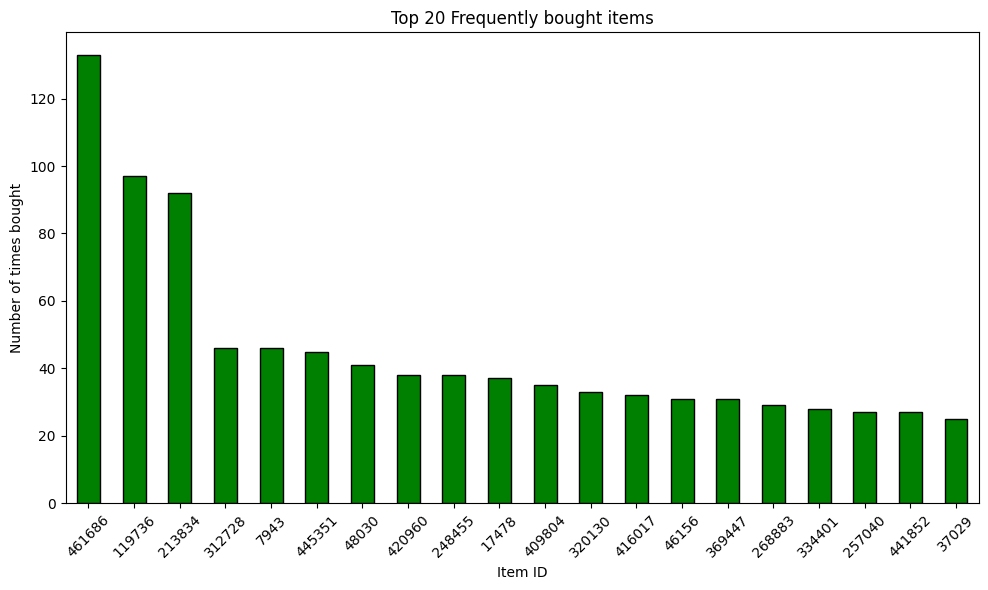

In [12]:
item_counts = events_data[events_data['transactionid'].notnull()].groupby('itemid')['timestamp'].count().sort_values(ascending=False)
print(f"Number of unique items bought: {item_counts.shape[0]}")

# Plot it
plt.figure(figsize=(10, 6))
item_counts.iloc[:20].plot(kind='bar', color='green', edgecolor='black')

plt.title('Top 20 Frequently bought items')
plt.xlabel('Item ID')
plt.ylabel('Number of times bought')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### Most frequent customers

Number of unique visitors: 1407580


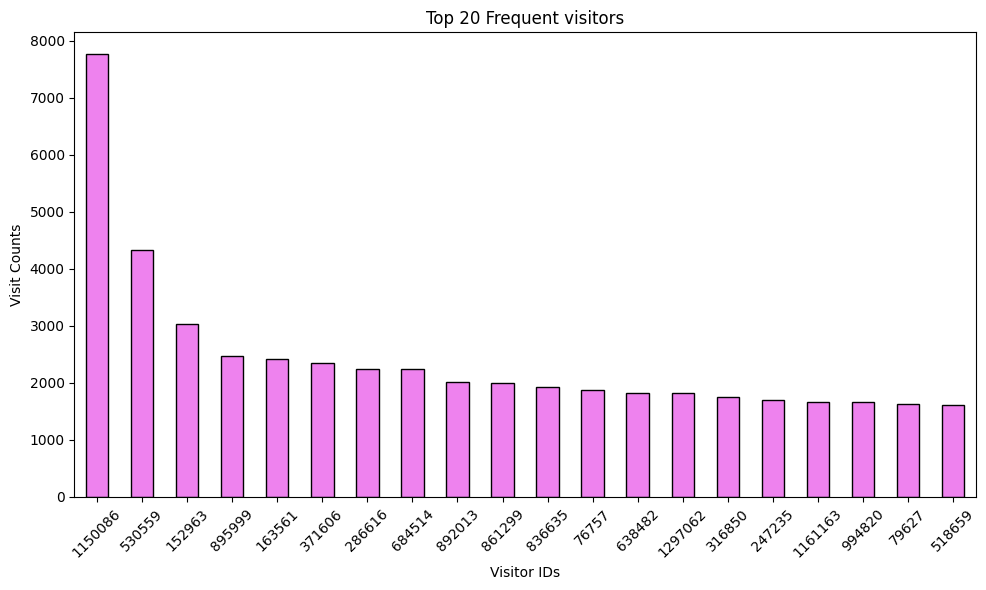

In [13]:
visitor_counts = events_data.groupby('visitorid')['timestamp'].count().sort_values(ascending=False)
print(f"Number of unique visitors: {visitor_counts.shape[0]}")

# Plot it
plt.figure(figsize=(10, 6))
visitor_counts.iloc[:20].plot(kind='bar', color='violet', edgecolor='black')

plt.title('Top 20 Frequent visitors')
plt.xlabel('Visitor IDs')
plt.ylabel('Visit Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Items Property Data

###### Data structure

In [14]:
# Convert timestamp to datetime
item_data['datetime'] = pd.to_datetime(item_data['timestamp'], unit='ms')
item_data = item_data.drop('Unnamed: 0', axis=1)
item_data.head()

,timestamp,itemid,property,value,datetime
0,1435460400000,460429,categoryid,1338,2015-06-28 03:00:00
1,1441508400000,206783,888,1116713 960601 n277.200,2015-09-06 03:00:00
2,1439089200000,395014,400,n552.000 639502 n720.000 424566,2015-08-09 03:00:00
3,1431226800000,59481,790,n15360.000,2015-05-10 03:00:00
4,1431831600000,156781,917,828513,2015-05-17 03:00:00


###### Data Description

In [15]:
item_data.describe()

,timestamp,itemid,datetime
count,2.200000e+07,2.200000e+07,21999998
mean,1.435158e+12,2.333851e+05,2015-06-24 14:56:58.477510656
min,1.431227e+12,0.000000e+00,2015-05-10 03:00:00
25%,1.432436e+12,1.165150e+05,2015-05-24 03:00:00
50%,1.433646e+12,2.334990e+05,2015-06-07 03:00:00
75%,1.437880e+12,3.501860e+05,2015-07-26 03:00:00
max,1.442113e+12,4.668660e+05,2015-09-13 03:00:00
std,3.327652e+09,1.348258e+05,NaN


###### Null Values

In [16]:
item_data.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
datetime     0
dtype: int64

In [17]:
item_data['property'].unique()

array(['categoryid', '888', '400', ..., '424', '494', '712'],
      shape=(1097,), dtype=object)

In [ ]:
# Sort to get latest first
item_data = item_data.sort_values(by=['itemid', 'property', 'datetime'], ascending=False)

# Drop duplicates to keep the latest (itemid, property)
latest_props = item_data.drop_duplicates(subset=['itemid', 'property'], keep='first')

# Pivot: each row = item, each column = property
pivoted = latest_props.pivot(index='itemid', columns='property', values='value')

# Optional: Reset index and rename columns for clarity
pivoted = pivoted.reset_index()
pivoted.columns.name = None  # Remove pivot metadata

# Save to processed folder
#pivoted.to_csv('data/processed/item_properties_wide.csv', index=False)

#print("✅ Processed item properties saved to 'data/processed/item_properties_wide.csv'")
pivoted